<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

### 1.1 Random numbers from the Normal distribution

In [1]:
np.random.normal(loc=5, scale=2, size=10)
# loc to specify the mean, scale to specify the s.d

array([3.2855903 , 5.89624204, 3.08984407, 5.2442956 , 4.91410996,
       6.81274697, 6.22392944, 2.80689107, 2.6969093 , 6.35235716])

### 1.2 Visualising the random numbers

Text(0, 0.5, 'Value of random number')

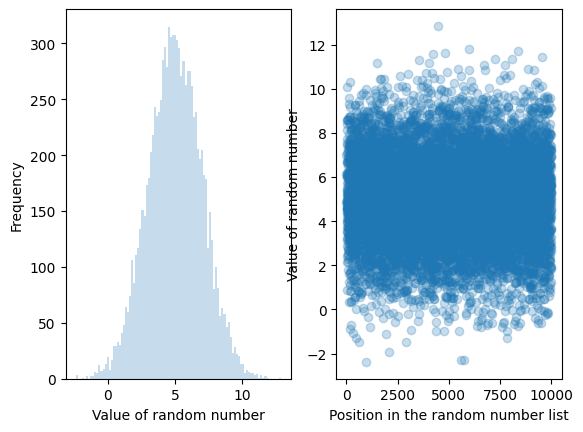

In [2]:
from matplotlib import pyplot as plt
n = 1_000_0
random_numbers = np.random.normal(loc=5, scale=2, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.3 68%?

In [4]:
n = 10_000
mean, sd = 5, 2
random_numbers = np.random.normal(loc=mean, scale=sd, size=n)

mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)

print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')

# 68% of the points lie between μ±σ. 

% of points between 1 std.dev. from the mean: 67.83%


## 1 Brownian Motion in 1D

### 1.1 The scenario

In [5]:
def brown_1d(prob_right=.5, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x

In [12]:
import numpy.random as rnd

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.5')

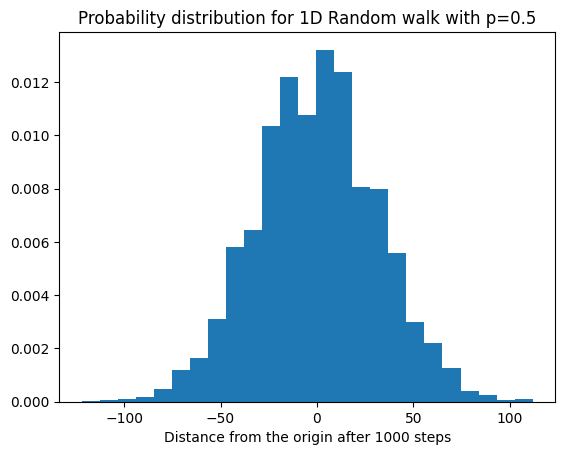

In [8]:
no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
# density = True means that matplotlib will normalise the data under the curve to 1
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.6')

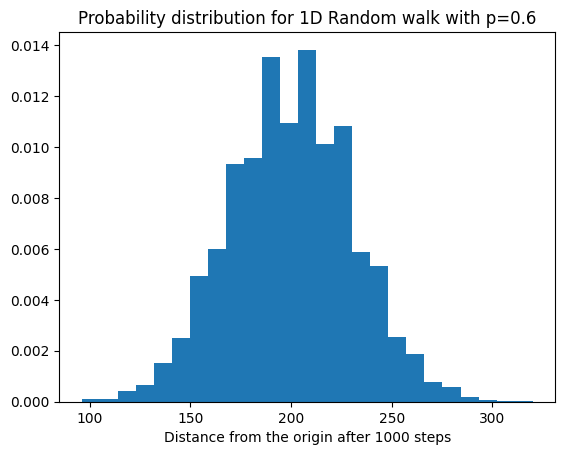

In [10]:
no_of_steps, p = 1_000, .6
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
# density = True means that matplotlib will normalise the data under the curve to 1
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

# curve shifts to the right

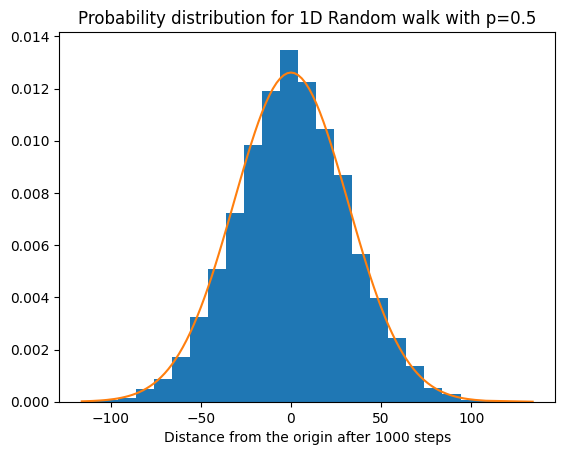

### 1.3 What does theory say?

In [15]:
def normal(x, m=0, s=1):
    '''
    Probability density function for the
    Gaussian distribution.
    '''
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output

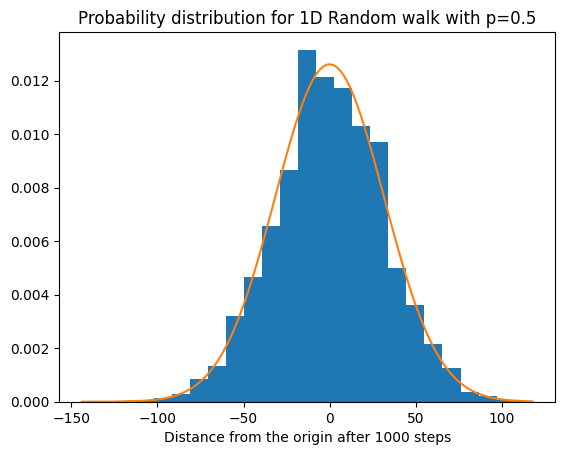

In [16]:
# overlaying normal dist on binomial dist

# original histogram:
no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
# density = True means that matplotlib will normalise the data under the curve to 1
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

# binomial curve:
prob_right=p
prob_left = 1 - prob_right                       # q = 1 -p
mean = no_of_steps * (prob_right - prob_left)    # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*prob_right*prob_left) # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
                                                 # the x-axis
plt.plot(x, normal(x, mean, sd), label='Theoretical')

## 2 Estimating \(\pi\)

### 2.1 The method

### 2.2 A poor but intuitive solution

In [18]:
# throwing one grain of sand at a time
N_total = 100_000                             # Yes, Python allows the _
N_green = 0

for _ in range(N_total):
    x = rnd.uniform(low=-1, high=1, size=1)     
    y = rnd.uniform(low=-1, high=1, size=1)
    r = np.sqrt(x**2 + y**2)                   # Distance from the origin

    if r <= 1:
        N_green += 1                           # In or out of the circle

4 * N_green / N_total                          # Estimate for pi

3.14084

### 2.3 A better solution

In [19]:
# generates multiple random numbers at once
N_total=1_000_000
x=rnd.uniform(low=-1, high=1, size=N_total)
y=rnd.uniform(low=-1, high=1, size=N_total)
N_green= np.sum((x**2+y**2) <= 1)                # Oh! the ease of NumPy!

4 * (N_green / N_total)

3.143508

### 2.4 A smarter solution

In [20]:
# don't limit expt to only first quad of circle and related square
N_total=1_000_000
x=rnd.rand(N_total)
y=rnd.rand(N_total)
N_green=np.sum((x**2+y**2) <= 1)

4 * (N_green / N_total)

3.141356

## Exercise 1 :  Vital Stats of Random π

In [13]:
def estimate_pi(n):
    n = 10000
    N_total=1_000_000
    x=rnd.rand(N_total)
    y=rnd.rand(N_total)
    N_green=np.sum((x**2+y**2) <= 1)
    return 4 * (N_green / N_total)
estimate_pi(n)

3.140364

In [14]:
x = []
for i in range (100):
    z = estimate_pi(n)
    x.append(z)
x
np.std(x)

0.00175906387604316

In [15]:
def mean (x):
    return sum(x)/len(x)
mean(x)

3.1412646

In [16]:
n_values=[10**1, 10**2, 10**3, 10**4, 10**5]
a = []
for n in n_values:
    def estimate_pi(n):
        N_total=1_000_000
        x=rnd.rand(N_total)
        y=rnd.rand(N_total)
        N_green=np.sum((x**2+y**2) <= 1)
        return 4 * (N_green / N_total)
    z = estimate_pi(n)
    a.append(z)
a

[3.139808, 3.142168, 3.143384, 3.141128, 3.140156]

In [20]:
c = []
for i in a:
    for j in range (100):
        b = estimate_pi(n)
        c.append(b)
c

[3.143544,
 3.14122,
 3.141992,
 3.143152,
 3.139756,
 3.142396,
 3.141452,
 3.138308,
 3.143636,
 3.14386,
 3.138808,
 3.142548,
 3.140004,
 3.144932,
 3.138232,
 3.141024,
 3.14274,
 3.143528,
 3.142068,
 3.140924,
 3.140592,
 3.14428,
 3.141636,
 3.140368,
 3.143408,
 3.140892,
 3.140104,
 3.140508,
 3.139796,
 3.141264,
 3.141976,
 3.14382,
 3.14126,
 3.141736,
 3.139812,
 3.142412,
 3.141608,
 3.141876,
 3.138088,
 3.144556,
 3.141852,
 3.14192,
 3.143756,
 3.141184,
 3.13986,
 3.142576,
 3.139184,
 3.14316,
 3.141824,
 3.140044,
 3.143728,
 3.142168,
 3.14432,
 3.143392,
 3.139396,
 3.138948,
 3.14334,
 3.142344,
 3.143424,
 3.140232,
 3.136712,
 3.144984,
 3.14134,
 3.140748,
 3.140232,
 3.14202,
 3.141568,
 3.14112,
 3.142392,
 3.141248,
 3.142752,
 3.143336,
 3.14198,
 3.1436,
 3.139268,
 3.141272,
 3.141828,
 3.140928,
 3.143396,
 3.140604,
 3.141024,
 3.14004,
 3.14228,
 3.143704,
 3.141728,
 3.143456,
 3.143692,
 3.139968,
 3.142948,
 3.140756,
 3.139748,
 3.14204,
 3.14292

In [51]:
list2 = [sum(c[i:i+100])/n for i in range(0,len(c),100)]
list2

[3.1416868399999993,
 3.14181588,
 3.1417292000000003,
 3.1415368400000006,
 3.1415426799999993]

In [50]:
list3 = [np.std(c[i:i+100]) for i in range(0,len(c),100)]
list3

[0.001696953816224815,
 0.0016673998397505052,
 0.0016184210082670133,
 0.001982450224948933,
 0.00149303546428075]

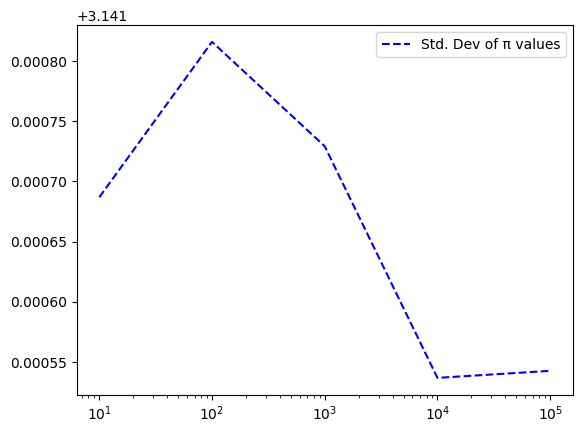

In [57]:
import math
x = [10**1, 10**2, 10**3, 10**4, 10**5]
y = list2
pi = np.pi

plt.plot(x, y, color='blue', linestyle='dashed', label='Std. Dev of π values')
plt.legend(loc='upper right')
fmt = 'o'

plt.xscale('log')

plt.show()

500